/var/folders/cf/lk26ttt55ds1sl3wv1t4lfs00000gn/T/ipykernel_34339/3273485058.py:29: DeprecationWarning: XML_Node::build: 
The CTI and XML input file formats are deprecated and will be removed in
Cantera 3.0. Use 'cti2yaml.py' or 'ctml2yaml.py' to convert CTI or XML input
files to the YAML format. See https://cantera.org/tutorials/legacy2yaml.html
for more information.
  gas = ct.Solution('./Jerzembeck.cti')



************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.449e-07      6.496
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      1.14e-05      6.276
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001948      5.419
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0006576       4.92
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002497      3.867
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solvi

(0.0, 0.02)

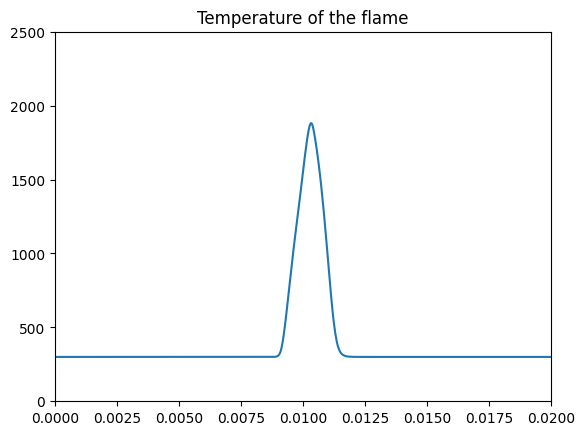

In [1]:
"""
An opposed-flow ethane/air diffusion flame

Requires: cantera >= 2.5.0, matplotlib >= 2.0
Keywords: combustion, 1D flow, diffusion flame, strained flame, plotting,
          saving output
"""

import cantera as ct
import matplotlib.pyplot as plt

# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
mdot_o = 1.7655  # kg/m^2/s
mdot_f = 3.5054072517  # kg/m^2/s #v=0.7554757008
#0.0758753268

comp_o = 'O2:0.21, N2:0.78, AR:0.01'  # air composition
comp_f = 'IXC8H18:1'  # fuel composition

width = 0.02  # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = ct.Solution('./Jerzembeck.cti')
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.boundary_emissivities = 0.0, 0.0
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show_solution()
try:
    # save to HDF container file if h5py is installed
    f.write_hdf('diffusion_flame.h5', mode='w')
except ImportError:
    f.save('diffusion_flame.yaml')

# write the velocity, temperature, and mole fractions to a CSV file
f.write_csv('diffusion_flame.csv', quiet=False)

f.show_stats(0)

# Plot Temperature without radiation
figTemperatureModifiedFlame = plt.figure()
plt.plot(f.flame.grid, f.T, label='Flame Temperature / K')
plt.title('Temperature of the flame')
plt.ylim(0,2500)
plt.xlim(0.000, 0.020)

# # Turn on radiation and solve again
# f.radiation_enabled = True
# f.solve(loglevel=1, refine_grid=False)
# f.show_solution()

# # Plot Temperature with radiation
# plt.plot(f.flame.grid, f.T, label='Temperature with radiation')
# plt.legend()
# plt.legend(loc=2)
# plt.savefig('./diffusion_flame.pdf')

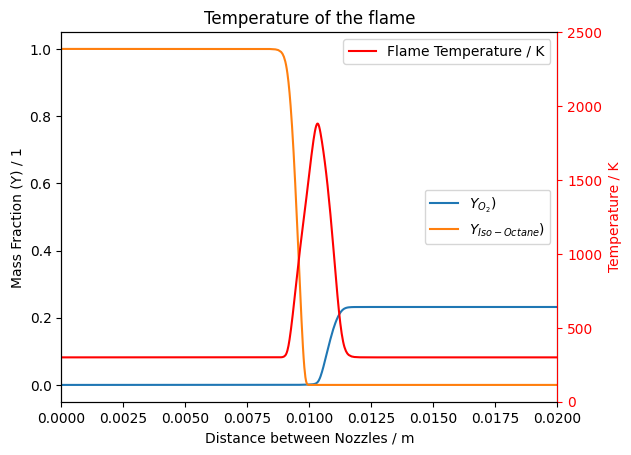

In [50]:
O2=[]
Oct=[]
O2=f.Y[(gas.species_index('O2'))]
Oct=f.Y[(gas.species_index('IXC8H18'))]
fig, ax1 = plt.subplots()
plt.title('Temperature of the flame')

ax2 = ax1.twinx()
ax2.plot(f.flame.grid, f.T, label='Flame Temperature / K', color='r')
ax2.set_ylim(0,2500)
plt.xlim(0.000, 0.020)
ax2.yaxis.label.set_color('r')
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel('Temperature / K')

ax1.plot(f.flame.grid,O2,label ='$Y_{O_2})$')
ax1.plot(f.flame.grid,Oct,label ='$Y_{Iso-Octane})$')
ax1.set_ylabel('Mass Fraction (Y) / 1')
ax1.set_xlabel('Distance between Nozzles / m')
ax1.legend(loc=5)
ax2.legend()


#list[j].append(gas.X[gas.species_index(species[j])])